Name: Arya Sun
<br>
Github Username: fearofhelicopter
<br>
USC ID: 8111052837

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import accuracy_score, precision_score, roc_curve, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set
from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
dataPath1 = "../data/wdbc.data"

dfWdBC = pd.read_csv(dataPath1, header=None)

dfWdBC = dfWdBC.iloc[:, 1:]

Y = dfWdBC.iloc[:,0]
X = dfWdBC.iloc[:,1:]

dfWdBC

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation
Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

#### (i) Supervised Learning
Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [3]:
def tuningLinearSVM(dfTrain_X, dfTrain_Y, param_grid, penalty):
    svm = LinearSVC(penalty=penalty, dual=False, max_iter=1000000)
    grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(dfTrain_X, dfTrain_Y)
    return grid_search.best_params_

In [4]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

Average test accuracy: 0.97, precision: 0.97, recall: 0.94, f1 score: 0.96, auc: 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.94      0.89      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

test confusion matrix:
 [[74  2]
 [ 4 34]]
Average train accuracy: 0.99, precision: 0.99, recall: 0.97, f1 score: 0.98, auc: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       281
           1       0.99      0.98      0.99       174

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455

train confusion matrix:
 [[279   2]
 [  3 171]]


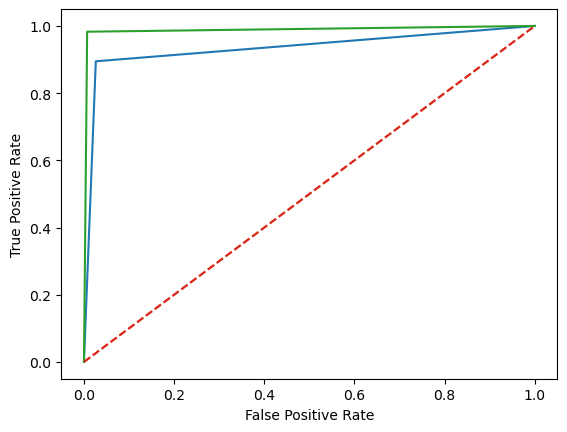

In [5]:
M = 30

accuracy_score_train_list = []
precision_score_train_list = []
recall_score_train_list = []
f1_score_train_list = []
auc_train_list = []

accuracy_score_test_list = []
precision_score_test_list = []
recall_score_test_list = []
f1_score_test_list = []
auc_test_list = []

label_dict = {
    "B":0, "M":1
}

for i in range(0, M):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    param_grid = {
        'C': np.logspace(-3, 6, 10)
    }

    best_params = tuningLinearSVM(X_train, y_train, param_grid, penalty='l1')
    #print("best hyperparameters: ", best_params)
    
    svm = LinearSVC(penalty='l1', C=best_params['C'], dual=False, max_iter=1000000)
    svm.fit(X_train, y_train)
    
    ##Testing##
    dfTest_pred = svm.predict(X_test)

    y_test = y_test.map(label_dict)
    dfTest_pred = [label_dict[p] for p in dfTest_pred]

    accuracy_score_test_list.append(accuracy_score(y_test, dfTest_pred))
    precision_score_test_list.append(precision_score(y_test, dfTest_pred))
    recall_score_test_list.append(recall_score(y_test, dfTest_pred))
    f1_score_test_list.append(f1_score(y_test, dfTest_pred))
    auc_test_list.append(roc_auc_score(y_test, dfTest_pred))

    ##Training##
    dfTrain_pred = svm.predict(X_train)

    y_train = y_train.map(label_dict)
    dfTrain_pred = [label_dict[p] for p in dfTrain_pred]

    accuracy_score_train_list.append(accuracy_score(y_train, dfTrain_pred))
    precision_score_train_list.append(precision_score(y_train, dfTrain_pred))
    recall_score_train_list.append(recall_score(y_train, dfTrain_pred))
    f1_score_train_list.append(f1_score(y_train, dfTrain_pred))
    auc_train_list.append(roc_auc_score(y_train, dfTrain_pred))
    
print("Average test accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1 score: {:.2f}, auc: {:.2f}".format(
    np.mean(accuracy_score_test_list), np.mean(precision_score_test_list), np.mean(recall_score_test_list),
    np.mean(f1_score_test_list), np.mean(auc_test_list)
))

print(classification_report(y_test, dfTest_pred))

cm = confusion_matrix(y_test, dfTest_pred)
print('test confusion matrix:\n', cm)

plot_roc_curve(y_test, dfTest_pred)


print("Average train accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1 score: {:.2f}, auc: {:.2f}".format(
    np.mean(accuracy_score_train_list), np.mean(precision_score_train_list), np.mean(recall_score_train_list),
    np.mean(f1_score_train_list), np.mean(auc_train_list)
))


print(classification_report(y_train, dfTrain_pred))

cm = confusion_matrix(y_train, dfTrain_pred)
print('train confusion matrix:\n', cm)

plot_roc_curve(y_train, dfTrain_pred)

#### (ii) Semi-Supervised Learning/ Self-training
select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

##### (A)
Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [6]:
Y = Y.map(label_dict)

dfLabeledPosX = X[Y==1]
dfLabeledNegX = X[Y==0]

dfLabeledTrainPos = dfLabeledPosX.sample(frac=0.5)
dfLabeledTrainNeg = dfLabeledNegX.sample(frac=0.5)

dfLabeledTrainX = pd.concat([dfLabeledTrainPos, dfLabeledTrainNeg], axis=0)
dfLabeledTrainY = Y.loc[dfLabeledTrainX.index]

unlabeledIndx = list(set(X.index) - set(dfLabeledTrainX.index))
dfUnLabeledX = X.loc[unlabeledIndx]
dfUnLabeledY = Y.loc[unlabeledIndx]


scaler = StandardScaler()
scaler.fit(dfLabeledTrainX)

dfLabeledTrainX = scaler.transform(dfLabeledTrainX)
dfUnLabeledX = scaler.transform(dfUnLabeledX)

dfUnLabeledX_raw = dfUnLabeledX.copy()


# param_grid = {
#     'C': np.logspace(-3, 6, 10)
# }

# best_params = tuningLinearSVM(dfLabeledTrainX, dfLabeledTrainY, param_grid, penalty='l1')
# print("best hyperparameters: ", best_params)

# svm = LinearSVC(penalty='l1', C=best_params['C'], loss='squared_hinge', dual=False, max_iter=10000)
# svm.fit(dfLabeledTrainX, dfLabeledTrainY)

##### (B)
Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

Average test accuracy: 0.96, precision: 1.00, recall: 0.91, f1 score: 0.95, auc: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       179
           1       1.00      0.91      0.95       106

    accuracy                           0.96       285
   macro avg       0.97      0.95      0.96       285
weighted avg       0.97      0.96      0.96       285

test confusion matrix:
 [[179   0]
 [ 10  96]]
Average train accuracy: 0.98, precision: 0.99, recall: 0.96, f1 score: 0.98, auc: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       369
           1       0.99      0.96      0.98       200

    accuracy                           0.98       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

train confusion matrix:
 [[367   2]
 [  7 193]]


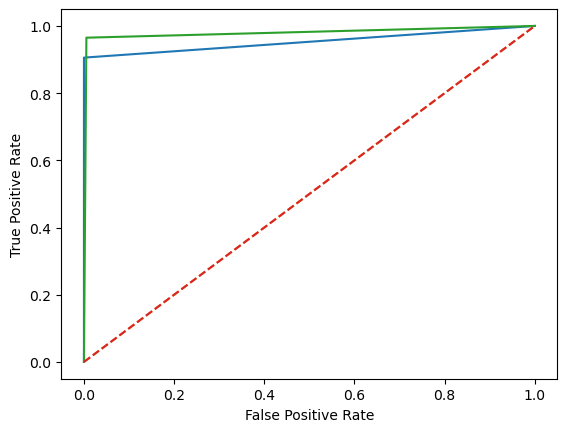

In [7]:
accuracy_score_train_list = []
precision_score_train_list = []
recall_score_train_list = []
f1_score_train_list = []
auc_train_list = []

accuracy_score_test_list = []
precision_score_test_list = []
recall_score_test_list = []
f1_score_test_list = []
auc_test_list = []

for i in range(0, M):
    rows = dfUnLabeledX.shape[0]
    
    param_grid = {
    'C': np.logspace(-3, 6, 10)
    }

    best_params = tuningLinearSVM(dfLabeledTrainX, dfLabeledTrainY, param_grid, penalty='l1')
    #print("best hyperparameters: ", best_params)

    for r in range(rows):
        svm = LinearSVC(penalty='l1', C=best_params['C'], loss='squared_hinge', dual=False, max_iter=10000)
        svm.fit(dfLabeledTrainX, dfLabeledTrainY)

        unlabeledPred = svm.decision_function(dfUnLabeledX)

        w_norm = np.linalg.norm(svm.coef_)
        dist = unlabeledPred / w_norm

        minIdx = np.argmin(dist)

        dfLabeledTrainX = np.vstack([dfLabeledTrainX, dfUnLabeledX[minIdx]])

        dfUnLabeledX = np.delete(dfUnLabeledX, minIdx, 0)

        if unlabeledPred[minIdx] >= 0:
            dfLabeledTrainY = pd.concat([dfLabeledTrainY, pd.Series(1)])
        else:
            dfLabeledTrainY = pd.concat([dfLabeledTrainY, pd.Series(0)])

    ##testing##
    unlabeledPred = svm.predict(dfUnLabeledX_raw)

    accuracy_score_test_list.append(accuracy_score(dfUnLabeledY, unlabeledPred))
    precision_score_test_list.append(precision_score(dfUnLabeledY, unlabeledPred))
    recall_score_test_list.append(recall_score(dfUnLabeledY, unlabeledPred))
    f1_score_test_list.append(f1_score(dfUnLabeledY, unlabeledPred))
    auc_test_list.append(roc_auc_score(dfUnLabeledY, unlabeledPred))

    ##traing##
    labeledPred = svm.predict(dfLabeledTrainX)

    accuracy_score_train_list.append(accuracy_score(dfLabeledTrainY, labeledPred))
    precision_score_train_list.append(precision_score(dfLabeledTrainY, labeledPred))
    recall_score_train_list.append(recall_score(dfLabeledTrainY, labeledPred))
    f1_score_train_list.append(f1_score(dfLabeledTrainY, labeledPred))
    auc_train_list.append(roc_auc_score(dfLabeledTrainY, labeledPred))

print("Average test accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1 score: {:.2f}, auc: {:.2f}".format(
    np.mean(accuracy_score_test_list), np.mean(precision_score_test_list), np.mean(recall_score_test_list),
    np.mean(f1_score_test_list), np.mean(auc_test_list)
))

print(classification_report(dfUnLabeledY, unlabeledPred))

cm = confusion_matrix(dfUnLabeledY, unlabeledPred)
print('test confusion matrix:\n', cm)

plot_roc_curve(dfUnLabeledY, unlabeledPred)

print("Average train accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1 score: {:.2f}, auc: {:.2f}".format(
    np.mean(accuracy_score_train_list), np.mean(precision_score_train_list), np.mean(recall_score_train_list),
    np.mean(f1_score_train_list), np.mean(auc_train_list)
))

print(classification_report(dfLabeledTrainY, labeledPred))

cm = confusion_matrix(dfLabeledTrainY, labeledPred)
print('train confusion matrix:\n', cm)

plot_roc_curve(dfLabeledTrainY, labeledPred)

#### (iii) Unsupervised Learning
Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

##### (A)
Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

One common approach is to run the algorithm multiple times with different initializations, selecting the most optimal solution among them. This is often achieved by using a stochastic method, initializing the algorithm with different initial cluster seeds, which can lead to diverse clustering results.

Employing an effective initialization function can result in better sum of squares distance, which may lower the chances of being trapped in a local minimum. Additionally, using random seed initialization can further increase the variety of initial conditions and help the algorithm avoid local minima.

Another strategy is to set the max_iter parameter in the algorithm. This parameter controls the maximum number of iterations for the algorithm, allowing it to restart multiple times if necessary. 

##### (B)
Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.
##### (C)
Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

Train Average accuracy: 0.85, precision: 0.99, recall: 0.60, f1 score: 0.75, auc: 0.80
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       292
           1       1.00      0.57      0.73       163

    accuracy                           0.85       455
   macro avg       0.90      0.79      0.81       455
weighted avg       0.88      0.85      0.83       455

train confusion matrix:
 [[292   0]
 [ 70  93]]
Test Average accuracy: 0.86, precision: 0.99, recall: 0.62, f1 score: 0.76, auc: 0.81
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        65
           1       0.97      0.73      0.84        49

    accuracy                           0.88       114
   macro avg       0.90      0.86      0.87       114
weighted avg       0.89      0.88      0.87       114

test confusion matrix:
 [[64  1]
 [13 36]]


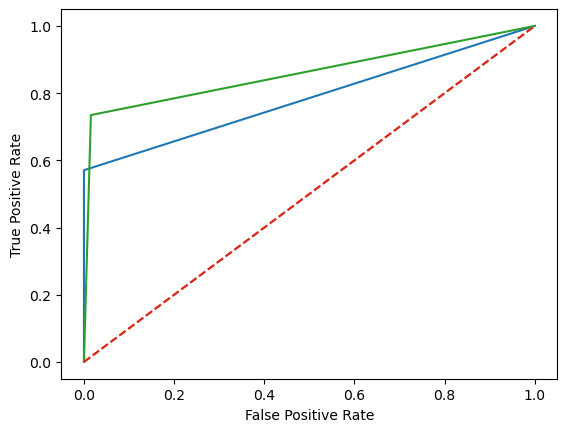

In [8]:
accuracy_score_train_list = []
precision_score_train_list = []
recall_score_train_list = []
f1_score_train_list = []
auc_train_list = []

accuracy_score_test_list = []
precision_score_test_list = []
recall_score_test_list = []
f1_score_test_list = []
auc_test_list = []

k_num = 2
for m in range(0, M):
    ##(A)##
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    kmeans = KMeans(n_clusters=k_num, init='random').fit(X_train)

    ##(B)##
    cluster_label = kmeans.labels_
    majority_dict = {}
    for k in range(0, k_num):
        X_cluster = X_train[cluster_label == k]
        X_dist = ((X_cluster - kmeans.cluster_centers_[k]) ** 2).sum(axis=1)
        majority = Y[X_dist[0:30].index].value_counts().index[0]
        majority_dict[k] = majority

    train_y_pred = [majority_dict[j] for j in cluster_label]

    accuracy_score_train_list.append(accuracy_score(y_train, train_y_pred))
    precision_score_train_list.append(precision_score(y_train, train_y_pred))
    recall_score_train_list.append(recall_score(y_train, train_y_pred))
    f1_score_train_list.append(f1_score(y_train, train_y_pred))
    auc_train_list.append(roc_auc_score(y_train, train_y_pred))

    ##(C)##
    test_y_pred = kmeans.predict(X_test)
    test_y_pred = [majority_dict[j] for j in test_y_pred]

    accuracy_score_test_list.append(accuracy_score(y_test, test_y_pred))
    precision_score_test_list.append(precision_score(y_test, test_y_pred))
    recall_score_test_list.append(recall_score(y_test, test_y_pred))
    f1_score_test_list.append(f1_score(y_test, test_y_pred))
    auc_test_list.append(roc_auc_score(y_test, test_y_pred))

print("Train Average accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1 score: {:.2f}, auc: {:.2f}".format(
    np.mean(accuracy_score_train_list), np.mean(precision_score_train_list), np.mean(recall_score_train_list),
    np.mean(f1_score_train_list), np.mean(auc_train_list)
))

print(classification_report(y_train, train_y_pred))

cm = confusion_matrix(y_train, train_y_pred)
print('train confusion matrix:\n', cm)

plot_roc_curve(y_train, train_y_pred)


print("Test Average accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1 score: {:.2f}, auc: {:.2f}".format(
    np.mean(accuracy_score_test_list), np.mean(precision_score_test_list), np.mean(recall_score_test_list),
    np.mean(f1_score_test_list), np.mean(auc_test_list)
))

print(classification_report(y_test, test_y_pred))

cm = confusion_matrix(y_test, test_y_pred)
print('test confusion matrix:\n', cm)

plot_roc_curve(y_test, test_y_pred)

#### (iv) Spectral Clustering
Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters. Instead, use fit − predict method.

Train Average accuracy: 0.63, precision: 0.68, recall: 0.01, f1 score: 0.01, auc: 0.50
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       282
           1       0.67      0.01      0.02       173

    accuracy                           0.62       455
   macro avg       0.64      0.50      0.39       455
weighted avg       0.64      0.62      0.48       455

train confusion matrix:
 [[281   1]
 [171   2]]
Test Average accuracy: 0.63, precision: 0.63, recall: 0.02, f1 score: 0.03, auc: 0.50
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        75
           1       1.00      0.03      0.05        39

    accuracy                           0.67       114
   macro avg       0.83      0.51      0.42       114
weighted avg       0.78      0.67      0.54       114

test confusion matrix:
 [[75  0]
 [38  1]]


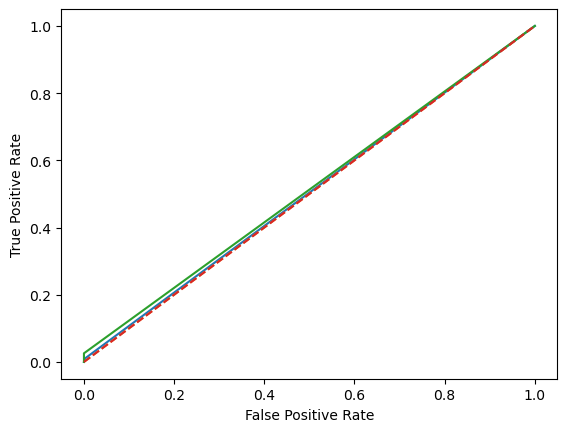

In [9]:
accuracy_score_train_list = []
precision_score_train_list = []
recall_score_train_list = []
f1_score_train_list = []
auc_train_list = []

accuracy_score_test_list = []
precision_score_test_list = []
recall_score_test_list = []
f1_score_test_list = []
auc_test_list = []

k_num = 2
scaler = StandardScaler()
for m in range(0, M):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    
    ##Training##
    train_y_pred = SpectralClustering(n_clusters=k_num, gamma=1, affinity='rbf', eigen_tol=1e-6).fit_predict(X_train_norm)

    accuracy_score_train_list.append(accuracy_score(y_train, train_y_pred))
    precision_score_train_list.append(precision_score(y_train, train_y_pred))
    recall_score_train_list.append(recall_score(y_train, train_y_pred))
    f1_score_train_list.append(f1_score(y_train, train_y_pred))
    auc_train_list.append(roc_auc_score(y_train, train_y_pred))
    
    ##Testing##
    test_y_pred = SpectralClustering(n_clusters=k_num, gamma=1, affinity='rbf', eigen_tol=1e-6).fit_predict(X_test_norm)

    accuracy_score_test_list.append(accuracy_score(y_test, test_y_pred))
    precision_score_test_list.append(precision_score(y_test, test_y_pred))
    recall_score_test_list.append(recall_score(y_test, test_y_pred))
    f1_score_test_list.append(f1_score(y_test, test_y_pred))
    auc_test_list.append(roc_auc_score(y_test, test_y_pred))

print("Train Average accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1 score: {:.2f}, auc: {:.2f}".format(
    np.mean(accuracy_score_train_list), np.mean(precision_score_train_list), np.mean(recall_score_train_list),
    np.mean(f1_score_train_list), np.mean(auc_train_list)
))

print(classification_report(y_train, train_y_pred))

cm = confusion_matrix(y_train, train_y_pred)
print('train confusion matrix:\n', cm)

plot_roc_curve(y_train, train_y_pred)


print("Test Average accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1 score: {:.2f}, auc: {:.2f}".format(
    np.mean(accuracy_score_test_list), np.mean(precision_score_test_list), np.mean(recall_score_test_list),
    np.mean(f1_score_test_list), np.mean(auc_test_list)
))

print(classification_report(y_test, test_y_pred))

cm = confusion_matrix(y_test, test_y_pred)
print('test confusion matrix:\n', cm)

plot_roc_curve(y_test, test_y_pred)

#### (v) Compare
One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

The results obtained by those methods are consistent with the above description, with supervised learning works a little bit better than semi-supervised learning, and unsupervised learning underperforms.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set
from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [10]:
dataPath2 = "../data/data_banknote_authentication.txt"
dfBank = pd.read_csv(dataPath2, header=None)

X = dfBank.iloc[:, 0:-1]
Y = dfBank.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=472, random_state=42)

dfBank

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### (b) Repeat each of the following two procedures 50 times
You will have 50 errors for 90 SVMs per each procedure.

#### (i) Passive
Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [11]:
X_train_1 = X_train.copy()
y_train_1 = y_train.copy()

all_errors = []

for i in range(50):
    X_train_1 = X_train.copy()
    y_train_1 = y_train.copy()
    error_list = []
    
    for batch in range(0, 890, 10):
        X_train_batch, X_train_1, y_train_batch, y_train_1 = train_test_split(X_train_1, y_train_1, train_size=10, stratify=y_train_1)

        param_grid = {
            'C': np.logspace(-3, 6, 10)
        }

        best_params = tuningLinearSVM(X_train_batch, y_train_batch, param_grid, penalty='l1')
        #print("best hyperparameters: ", best_params)

        svm = LinearSVC(penalty='l1', C=best_params['C'], dual=False, max_iter=10000)
        svm.fit(X_train_batch, y_train_batch)

        dfTest_pred = svm.predict(X_test)

        error = 1 - accuracy_score(y_test, dfTest_pred)

        error_list.append(error)

    # Additional step for batch size of 900
    svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    svm.fit(X_train, y_train)
    dfTest_pred = svm.predict(X_test)
    error = 1 - accuracy_score(y_test, dfTest_pred)
    error_list.append(error)

    all_errors.append(error_list)

# Create dataframe with error and batch size columns
batch_sizes = np.arange(10, 910, 10)
df_all_errors_passive = pd.DataFrame({'batch_size': batch_sizes})

for i, error_list in enumerate(all_errors):
    df_all_errors_passive[f'test_error_{i}'] = error_list
    
df_all_errors_passive

,batch_size,test_error_0,test_error_1,test_error_2,test_error_3,test_error_4,test_error_5,test_error_6,test_error_7,test_error_8,...,test_error_40,test_error_41,test_error_42,test_error_43,test_error_44,test_error_45,test_error_46,test_error_47,test_error_48,test_error_49
0,10,0.135593,0.110169,0.108051,0.194915,0.141949,0.141949,0.144068,0.131356,0.101695,...,0.019068,0.180085,0.171610,0.368644,0.082627,0.052966,0.122881,0.088983,0.016949,0.158898
1,20,0.023305,0.186441,0.082627,0.127119,0.163136,0.167373,0.226695,0.177966,0.169492,...,0.016949,0.038136,0.237288,0.146186,0.019068,0.173729,0.082627,0.040254,0.188559,0.105932
2,30,0.125000,0.305085,0.156780,0.133475,0.139831,0.141949,0.141949,0.084746,0.150424,...,0.211864,0.055085,0.027542,0.029661,0.127119,0.154661,0.014831,0.031780,0.019068,0.055085
3,40,0.135593,0.173729,0.139831,0.052966,0.226695,0.141949,0.029661,0.055085,0.368644,...,0.131356,0.025424,0.156780,0.021186,0.154661,0.061441,0.192797,0.010593,0.084746,0.099576
4,50,0.016949,0.186441,0.152542,0.173729,0.059322,0.368644,0.036017,0.133475,0.014831,...,0.118644,0.141949,0.072034,0.019068,0.114407,0.055085,0.040254,0.173729,0.078390,0.112288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,860,0.161017,0.067797,0.065678,0.063559,0.148305,0.093220,0.125000,0.182203,0.031780,...,0.152542,0.139831,0.141949,0.175847,0.080508,0.250000,0.211864,0.055085,0.173729,0.048729
86,870,0.173729,0.146186,0.093220,0.084746,0.139831,0.108051,0.173729,0.141949,0.247881,...,0.042373,0.436441,0.201271,0.173729,0.139831,0.105932,0.099576,0.173729,0.036017,0.156780
87,880,0.082627,0.012712,0.044492,0.163136,0.103814,0.080508,0.154661,0.122881,0.131356,...,0.046610,0.078390,0.061441,0.298729,0.112288,0.167373,0.216102,0.184322,0.152542,0.129237
88,890,0.131356,0.125000,0.046610,0.048729,0.235169,0.023305,0.146186,0.152542,0.152542,...,0.146186,0.023305,0.133475,0.150424,0.158898,0.141949,0.169492,0.120763,0.084746,0.235169


#### (ii) Active
Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [12]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

all_errors = []

for _ in range(50):
    error_list = []
    trainIds = np.arange(X_train_norm.shape[0])
    initialRow = list(np.random.choice(trainIds, 10, replace=False))

    while len(set(y_train.iloc[initialRow])) < 2:
        initialRow = list(np.random.choice(trainIds, 10, replace=False))

    for batch in range(0, 900, 10):
        X_train_batch = X_train_norm[initialRow]
        y_train_batch = y_train.iloc[initialRow]

        trainIdxIn = np.isin(trainIds, initialRow)
        X_train_rest = X_train_norm[~trainIdxIn]
        y_train_rest = y_train.iloc[~trainIdxIn]

        param_grid = {
            'C': np.logspace(-3, 6, 10)
        }

        best_params = tuningLinearSVM(X_train_batch, y_train_batch, param_grid, penalty='l1')
        #print("best hyperparameters: ", best_params)

        svm = LinearSVC(penalty='l1', C=best_params['C'], dual=False, max_iter=1000000)
        svm.fit(X_train_batch, y_train_batch)

        dfTest_pred = svm.predict(X_test_norm)
        error = 1 - accuracy_score(y_test, dfTest_pred)
        error_list.append(error)

        if X_train_rest.size == 0:
            break

        train_rest_decision = svm.decision_function(X_train_rest)
        w_norm = np.linalg.norm(svm.coef_)
        dist = abs(train_rest_decision / w_norm)

        dfDist = pd.DataFrame({"index": np.arange(X_train_rest.shape[0]), "dist": dist})
        dfDist = dfDist.sort_values("dist")
        rowForNext = dfDist["index"].head(10)

        initialRow.extend(list(rowForNext))

    all_errors.append(error_list)

# Create dataframe with error and batch size columns
batch_sizes = np.arange(10, 910, 10)
df_all_errors_active = pd.DataFrame({'batch_size': batch_sizes})

for i, error_list in enumerate(all_errors):
    df_all_errors_active[f'test_error_{i}'] = error_list

df_all_errors_active

,batch_size,test_error_0,test_error_1,test_error_2,test_error_3,test_error_4,test_error_5,test_error_6,test_error_7,test_error_8,...,test_error_40,test_error_41,test_error_42,test_error_43,test_error_44,test_error_45,test_error_46,test_error_47,test_error_48,test_error_49
0,10,0.031780,0.163136,0.036017,0.019068,0.101695,0.163136,0.381356,0.161017,0.163136,...,0.118644,0.360169,0.436441,0.436441,0.163136,0.129237,0.040254,0.029661,0.046610,0.021186
1,20,0.025424,0.014831,0.029661,0.010593,0.021186,0.163136,0.031780,0.029661,0.021186,...,0.019068,0.023305,0.154661,0.163136,0.093220,0.129237,0.019068,0.163136,0.016949,0.031780
2,30,0.025424,0.014831,0.025424,0.014831,0.019068,0.163136,0.016949,0.021186,0.050847,...,0.012712,0.025424,0.038136,0.044492,0.033898,0.101695,0.019068,0.021186,0.014831,0.016949
3,40,0.025424,0.014831,0.019068,0.025424,0.016949,0.033898,0.042373,0.012712,0.050847,...,0.016949,0.025424,0.027542,0.021186,0.014831,0.029661,0.021186,0.076271,0.014831,0.019068
4,50,0.023305,0.014831,0.019068,0.019068,0.016949,0.021186,0.048729,0.019068,0.029661,...,0.016949,0.025424,0.014831,0.010593,0.021186,0.029661,0.019068,0.023305,0.014831,0.014831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,860,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593,0.012712,0.010593,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.012712,0.012712,0.010593,0.010593,0.010593
86,870,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593,0.012712,0.010593,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.012712,0.012712,0.010593,0.010593,0.010593
87,880,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593,0.012712,0.010593,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.008475,0.012712,0.010593,0.010593,0.010593
88,890,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593,0.012712,0.010593,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.012712,0.012712,0.010593,0.010593,0.010593


### (c) Average the 50 test errors
Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

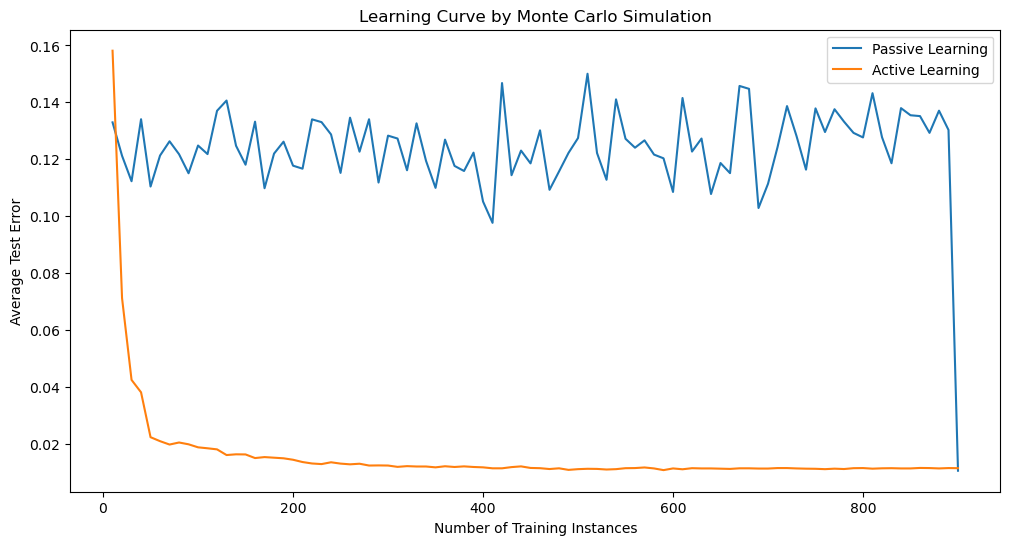

In [13]:
# Calculate the average test error for both passive and active learners
df_all_errors_passive["avg_error"] = df_all_errors_passive.iloc[:, 1:].mean(axis=1)
df_all_errors_active["avg_error"] = df_all_errors_active.iloc[:, 1:].mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(df_all_errors_passive["batch_size"], df_all_errors_passive["avg_error"], label="Passive Learning")
plt.plot(df_all_errors_active["batch_size"], df_all_errors_active["avg_error"], label="Active Learning")
plt.xlabel("Number of Training Instances")
plt.ylabel("Average Test Error")
plt.title("Learning Curve by Monte Carlo Simulation")
plt.legend()
plt.show()

The active learner has a lower average test error compared to the passive learner as the number of training instances increases. This implies that the active learning strategy is more efficient in selecting the most informative samples, which helps the SVM model to generalize better on unseen data.

The active learning approach reduces the test error faster as the number of training instances grows, which means it can achieve better performance with fewer samples.